# LIB

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
import matplotlib.pyplot as plt

# file path

In [ ]:
train_path="/content/train_data.txt"

In [ ]:
test_path="/content/test_data.txt"

In [ ]:
train_data = pd.read_csv(train_path, sep=":::", names=["ID","TITLE", "GENRE", "DESCRIPTION"], engine="python")

In [ ]:
train_data

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [ ]:
num_columns = train_data.shape[1]
num_rows = train_data.shape[0]

print(f"Number of Columns: {num_columns}")
print(f"Number of Rows: {num_rows}")

Number of Columns: 4
Number of Rows: 54214


In [ ]:
numeric_columns = train_data.select_dtypes(include=[np.number])
missing_values = numeric_columns.isnull().sum()

In [ ]:
train_data.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [ ]:
test_data = pd.read_csv(test_path, sep=":::", names=["ID","TITLE", "DESCRIPTION"], engine="python")

In [ ]:
test_data

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [ ]:
numeric_columns = test_data.select_dtypes(include=[np.number])
missing_values = numeric_columns.isnull().sum()

In [ ]:
test_data.isnull().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [ ]:
num_columns = test_data.shape[1]
num_rows = test_data.shape[0]

print(f"Number of Columns: {num_columns}")
print(f"Number of Rows: {num_rows}")

Number of Columns: 3
Number of Rows: 54200


# data cleaning/preprocessing

In [ ]:
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Initializing stemmer and stopwords
stemmer = LancasterStemmer()
stop_words = set(stopwords.words("english"))

In [ ]:
# Function to clean text
def cleaning_data(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove mentions
    text = re.sub(r'@\S+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove image extensions
    text = re.sub(r'.pic\S+', '', text)
    # Replace non-alphabetic characters with a space
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    # Remove punctuation
    text = "".join([char for char in text if char not in string.punctuation])
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords and words with length <= 2
    text = " ".join([word for word in words if word not in stop_words and len(word) > 2])
    # Replace multiple spaces with a single space
    text = re.sub(r"\s+", " ", text).strip()

    return text

In [ ]:
# Apply cleaning_data function to DESCRIPTION column and create new column TextCleaning
train_data["TextCleaning"] = train_data["DESCRIPTION"].apply(cleaning_data)
test_data["TextCleaning"] = test_data["DESCRIPTION"].apply(cleaning_data)

In [ ]:
train_data

,ID,TITLE,GENRE,DESCRIPTION,TextCleaning
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...
...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...,short lived nbc live sitcom centered bonino wo...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt stand comedy growing facing fears...
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


In [ ]:
test_data

,ID,TITLE,DESCRIPTION,TextCleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother years serious cance...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genres tales light dark anth...
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie years making oliver twist artful dodger ...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock mike mallard askew bro...


# TF_IDF

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X_train = vectorizer.fit_transform(train_data["TextCleaning"])
X_test  = vectorizer.transform(test_data["TextCleaning"])

In [ ]:
X_train

<54214x116601 sparse matrix of type '<class 'numpy.float64'>'
	with 2607208 stored elements in Compressed Sparse Row format>

In [ ]:
X_test

<54200x116601 sparse matrix of type '<class 'numpy.float64'>'
	with 2550327 stored elements in Compressed Sparse Row format>

# Training

In [ ]:
X = X_train
y = train_data["GENRE"]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

# Models


Navie_bayers


In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
NB_pred = nb_classifier.predict(X_test)

In [ ]:
NB_accuracy_score = accuracy_score(Y_test, NB_pred)
NB_f1_score = f1_score(Y_test, NB_pred, average='weighted')
NB_precision_score =precision_score(Y_test,NB_pred,average='weighted')
NB_recall_score = recall_score(Y_test, NB_pred,average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Accuracy: {NB_accuracy_score:.2f}")
print(f"F1 Score: {NB_f1_score:.2f}")
print(f"precision: {NB_precision_score:.2f}")
print(f"Recall Score: {NB_recall_score:.2f}")

Accuracy: 0.45
F1 Score: 0.31
precision: 0.36
Recall Score: 0.45


Logistic regression


In [ ]:
LG = LogisticRegression()
LG.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
LG_pred = LG.predict(X_test)

In [ ]:
LG_accuracy_score = accuracy_score(Y_test, LG_pred)
LG_f1_score = f1_score(Y_test, LG_pred, average='weighted')
LG_precision_score =precision_score(Y_test,LG_pred,average='weighted')
LG_recall_score = recall_score(Y_test, LG_pred,average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Accuracy: {LG_accuracy_score:.2f}")
print(f"F1 Score: {LG_f1_score:.2f}")
print(f"precision: {LG_precision_score:.2f}")
print(f"Recall Score: {LG_recall_score:.2f}")

Accuracy: 0.58
F1 Score: 0.53
precision: 0.55
Recall Score: 0.58


SVM

In [ ]:
svm = SVC(kernel='linear', C=1)
svm.fit(X_train,Y_train)

SVC(C=1, kernel='linear')

In [ ]:
svm_pred = svm.predict(X_test)

In [ ]:
svm_accuracy_score = accuracy_score(Y_test, svm_pred)
svm_f1_score = f1_score(Y_test, svm_pred, average='weighted')
svm_precision_score =precision_score(Y_test,svm_pred,average='weighted')
svm_recall_score = recall_score(Y_test, svm_pred,average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Accuracy: {svm_accuracy_score:.2f}")
print(f"F1 Score: {svm_f1_score:.2f}")
print(f"precision: {svm_precision_score:.2f}")
print(f"Recall Score: {svm_recall_score:.2f}")

Accuracy: 0.60
F1 Score: 0.56
precision: 0.58
Recall Score: 0.60


# Bar chart

In [ ]:
models = ['Navie_bayers', 'Logistic regression','SVM']
m_accuracy = [0.45, 0.58, 0.60]
m_f1_score = [0.31, 0.53, 0.56]
m_percision= [0.36, 0.55, 0.58]
m_recall   = [0.45, 0.58, 0.60]

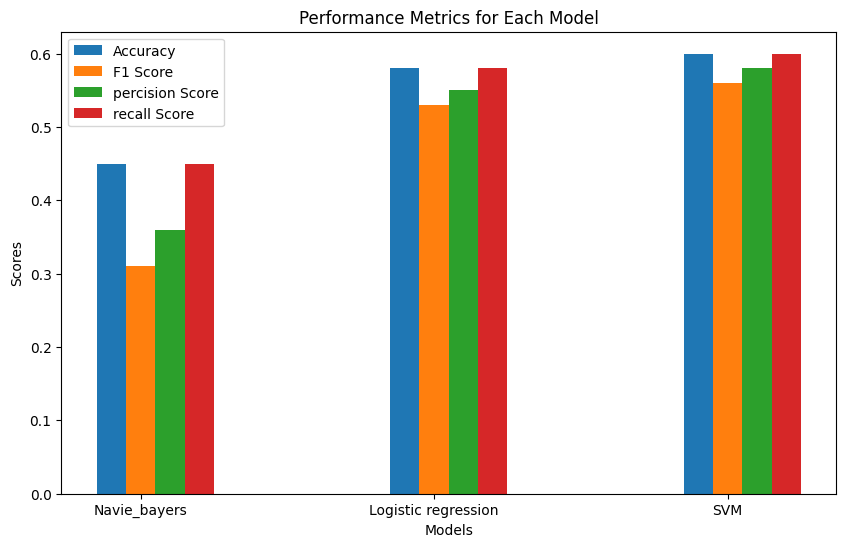

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.1
bar_positions1 = np.arange(len(models))
bar_positions2 = [pos + bar_width for pos in bar_positions1]
bar_positions3 = [pos + 2 * bar_width for pos in bar_positions1]
bar_positions4 = [pos + 3 * bar_width for pos in bar_positions1]

plt.bar(bar_positions1, m_accuracy, width=bar_width, label='Accuracy')
plt.bar(bar_positions2, m_f1_score, width=bar_width, label='F1 Score')
plt.bar(bar_positions3, m_percision, width=bar_width, label='percision Score')
plt.bar(bar_positions4, m_recall, width=bar_width, label='recall Score'
)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics for Each Model')
plt.xticks([pos + bar_width for pos in bar_positions1], models)
plt.legend()

plt.show()